In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as sps

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [ ]:
nvda = yf.Ticker('NVDA')

In [ ]:
df = nvda.history(period='2y')

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-02-22 00:00:00-05:00,230.032752,240.308573,229.683228,233.577850,63342200,0.0,0.0
2022-02-23 00:00:00-05:00,237.692181,241.217318,222.702845,223.561661,56651100,0.0,0.0
2022-02-24 00:00:00-05:00,209.860576,237.672227,208.612297,237.152939,73580100,0.0,0.0
2022-02-25 00:00:00-05:00,236.883279,241.836439,233.487953,241.237274,52886600,0.0,0.0
2022-02-28 00:00:00-05:00,239.589550,246.310276,236.743484,243.514145,47731900,0.0,0.0


In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,501.000000,501.000000,501.000000,501.000000,5.010000e+02,501.000000,501.0
mean,299.420965,304.995371,293.952124,299.893120,5.041241e+07,0.000639,0.0
std,150.377206,151.881459,148.231103,150.314853,1.499520e+07,0.005019,0.0
min,109.633295,117.267957,108.054398,112.191505,1.679340e+07,0.000000,0.0
25%,169.720769,173.889824,166.276235,169.750748,4.014630e+07,0.000000,0.0
50%,241.683829,246.310276,234.765831,243.514145,4.780940e+07,0.000000,0.0
75%,438.291442,442.381105,429.982175,438.005402,5.701900e+07,0.000000,0.0
max,741.000000,746.109985,725.010010,739.000000,1.543911e+08,0.040000,0.0


Text(0.5, 1.0, 'Stock close price movement for Feb 2022 to Feb 2024')

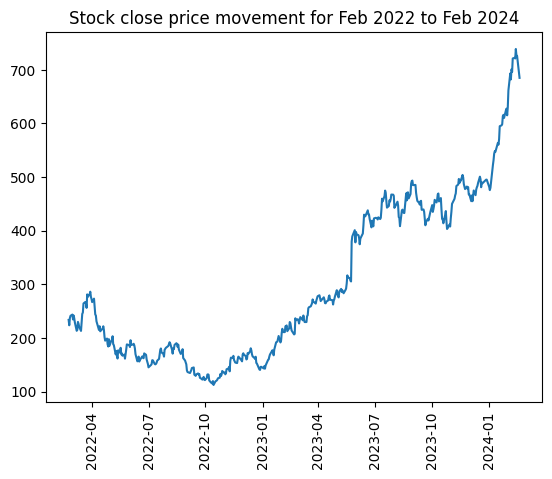

In [ ]:
plt.plot(df['Close'])
plt.xticks(rotation=90)
plt.title("Stock close price movement for Feb 2022 to Feb 2024")

Text(0.5, 1.0, 'Close')

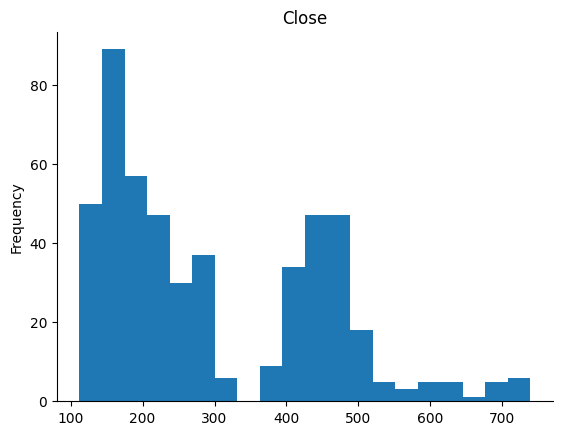

In [ ]:
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Close')

In [ ]:
df['Close'].min()

112.1915054321289

In [ ]:
returns = (df['Close'].pct_change()).to_numpy()[1:]
log_returns = np.log((df['Close'].pct_change() + 1).to_numpy())[1:]

In [ ]:
returns[:10]

array([-0.04288159,  0.06079432,  0.01722237,  0.0094383 , -0.03723605,
        0.0318238 , -0.02089177, -0.03280778, -0.06906161,  0.0075871 ])

In [ ]:
log_returns[:10]

array([-0.04382816,  0.05901798,  0.01707574,  0.00939404, -0.03794702,
        0.03132792, -0.02111309, -0.03335802, -0.07156217,  0.00755846])

In [ ]:
assert len(returns)==len(log_returns)
print('Lengths are the same')

Lengths are the same


Text(0.5, 1.0, 'Log returns of NVDA stock 14 feb 2022 - 13 feb 2024')

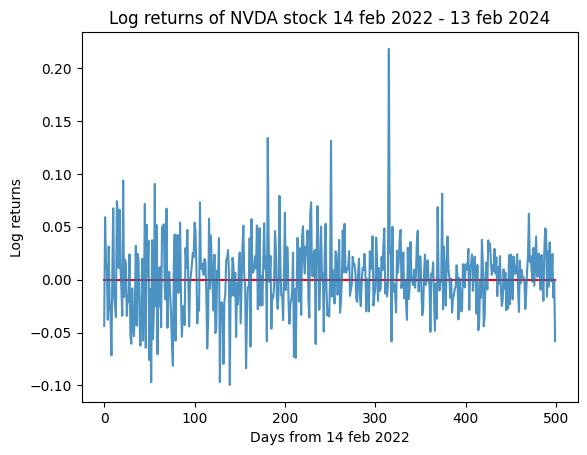

In [ ]:
plt.plot(np.arange(len(log_returns)), np.zeros(len(log_returns)), color="red")
plt.plot(np.arange(len(log_returns)), log_returns, alpha=0.8)
plt.xlabel("Days from 14 feb 2022")
plt.ylabel("Log returns")
plt.title("Log returns of NVDA stock 14 feb 2022 - 13 feb 2024")

In [ ]:
print(log_returns.min(), log_returns.max())

-0.09951767416304427 0.21808780603737588


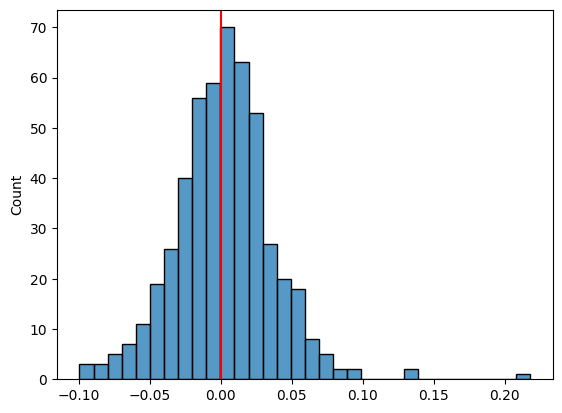

In [ ]:
ax = sns.histplot(log_returns)
ax.axvline(x = 0,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1, color="red")

Как мы видим, центр графика чуть смещён вправо от 0 (что связано с общим ростом цены на акцию), а также имеется несколько выбросов в правой части графика.

Давайте отнормируем наши данные, чтобы применить qqplot

In [ ]:
log_returns_std = (log_returns - np.mean(log_returns)) / np.std(log_returns)

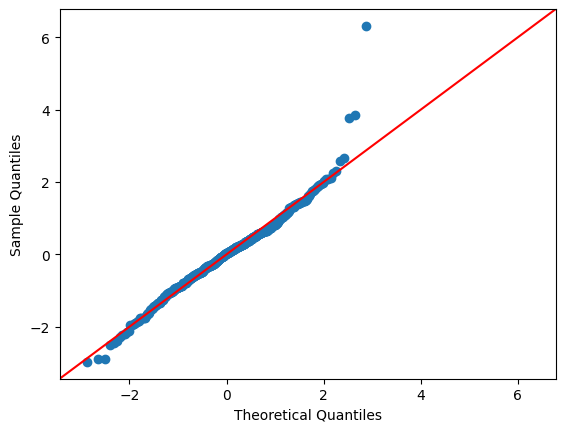

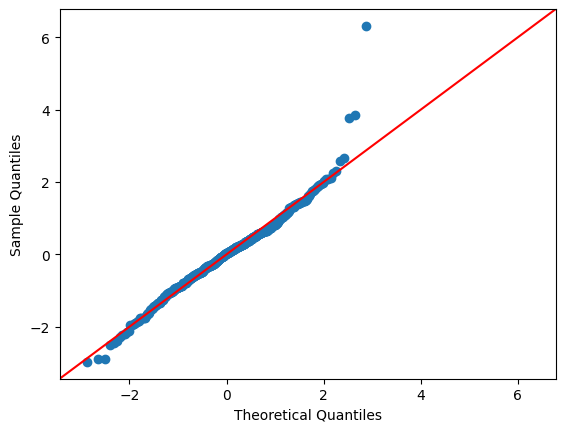

In [ ]:
sm.qqplot(log_returns_std, line='45')

Как мы видим, qqplot для нашей выборки практически совпадает с теоретическим для нормального, однако из-за выбросов получаем плохие результаты

In [ ]:
sps.shapiro(log_returns)

ShapiroResult(statistic=0.9690530896186829, pvalue=8.921426264407728e-09)

In [ ]:
sps.kstest(log_returns_std, 'norm')

KstestResult(statistic=0.054132720246558685, pvalue=0.10289383694122267, statistic_location=0.6553142615463233, statistic_sign=1)

В случае критерия Шапиро-Уилка получили p_value, близкое к 0, а в случае критерия Колмогорова-Смирнова получили более хорошее p_value, это связано с меньшей чувствительностью к выбросам

Давайте теперь расмотрим другое унимодальное распределение, например, Лапласа

In [ ]:
print(sps.kstest(log_returns_std, sps.laplace.cdf))

KstestResult(statistic=0.06475974336084211, pvalue=0.028841275430397384, statistic_location=0.8544445347866193, statistic_sign=1)


Нельзя сказать, что результаты лучше. Таким образом, распределение почти всегда похоже на нормальное, за исключением нескольких дней - выбросов, когда (гипотеза) происходила переоценка стоимости компании на фоне новостей о ней или общих сильных движений рынка